In [1]:
##Importing libaries#
import warnings 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Instaling and importing seaborn
%pip install seaborn
import seaborn as sns

In [3]:
# Set a style for the plots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
#Load the monthlysales Dataset
DF = pd.read_csv('data/Walmart_Store_sales.csv')
print("DF Shape:", DF.shape)
DF.head()

DF Shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#Loading Datasets 
features = pd.read_csv('data/walmart_features (1).csv')
#print(Features.info())

#storesdata = pd.read_csv('data/Walmart_Store_sales.csv')
#print(storedata.info())

traindata = pd.read_csv('data/walmart_train.csv')
#print(traindata.info())

In [9]:
    m_df = pd.merge(features, DF, on=("Store", "Date"), how='outer') #Merging first two DataFrames
    print('m_df shape:', m_df.shape)
    m_df.head()

m_df shape: (14625, 18)


,Store,Date,Temperature_x,Fuel_Price_x,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_x,Unemployment_x,IsHoliday,Weekly_Sales,Holiday_Flag,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y
0,1,01-04-2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495064.75,0.0,59.17,3.524,214.837166,7.682
1,1,01-06-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624477.58,0.0,77.95,3.501,221.747214,7.143
2,1,01-07-2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488538.09,0.0,85.55,3.524,215.184137,7.962
3,1,01-10-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1453329.50,0.0,71.89,2.603,211.671989,7.838
4,1,02-03-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1688420.76,0.0,60.96,3.630,220.848045,7.348


In [10]:
    df = pd.merge(m_df, traindata, on=("Store", "Date"))  Second Merge
    print('df shape:', df.shape)
    df.head()

df shape: (421570, 21)


,Store,Date,Temperature_x,Fuel_Price_x,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_x,...,IsHoliday_x,Weekly_Sales_x,Holiday_Flag,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y,Dept,Weekly_Sales_y,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,NaN,NaN,NaN,NaN,NaN,NaN,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,NaN,NaN,NaN,NaN,NaN,NaN,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,NaN,NaN,NaN,NaN,NaN,NaN,5,32229.38,False


In [11]:
#WrangleFunction
df.drop(['Temperature_x', 'Temperature_y', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI_x', 'CPI_y', 'Unemployment_x', 'Unemployment_y', 'IsHoliday_y', 'Weekly_Sales_x', 'Holiday_Flag', 'Fuel_Price_y'], axis=1, inplace=True) #Unique/Complex Or irrelevant columns/information

In [12]:
print('df new shape:', df.shape)
df.describe()

df new shape: (421570, 6)


,Store,Fuel_Price_x,Dept,Weekly_Sales_y
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,3.361027,44.260317,15981.258123
std,12.785297,0.458515,30.492054,22711.183519
min,1.000000,2.472000,1.000000,-4988.940000
25%,11.000000,2.933000,18.000000,2079.650000
50%,22.000000,3.452000,37.000000,7612.030000
75%,33.000000,3.738000,74.000000,20205.852500
max,45.000000,4.468000,99.000000,693099.360000


In [13]:
# Correcting the format error : Converting 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [14]:
# The dataset is weekly, so we'll resample to a monthly frequency.
monthly_sales = df.set_index('Date').resample('MS')['Weekly_Sales_y'].sum().to_frame()

In [15]:
df.head()

,Store,Date,Fuel_Price_x,IsHoliday_x,Dept,Weekly_Sales_y
0,1,2010-02-05,2.572,False,1,24924.50
1,1,2010-02-05,2.572,False,2,50605.27
2,1,2010-02-05,2.572,False,3,13740.12
3,1,2010-02-05,2.572,False,4,39954.04
4,1,2010-02-05,2.572,False,5,32229.38


In [16]:
print("\nMonthly sales data (aggregated):")
print(monthly_sales.head())


Monthly sales data (aggregated):
            Weekly_Sales_y
Date                      
2010-02-01    1.903330e+08
2010-03-01    1.819198e+08
2010-04-01    2.314124e+08
2010-05-01    1.867109e+08
2010-06-01    1.922462e+08


<function matplotlib.pyplot.show(close=None, block=None)>

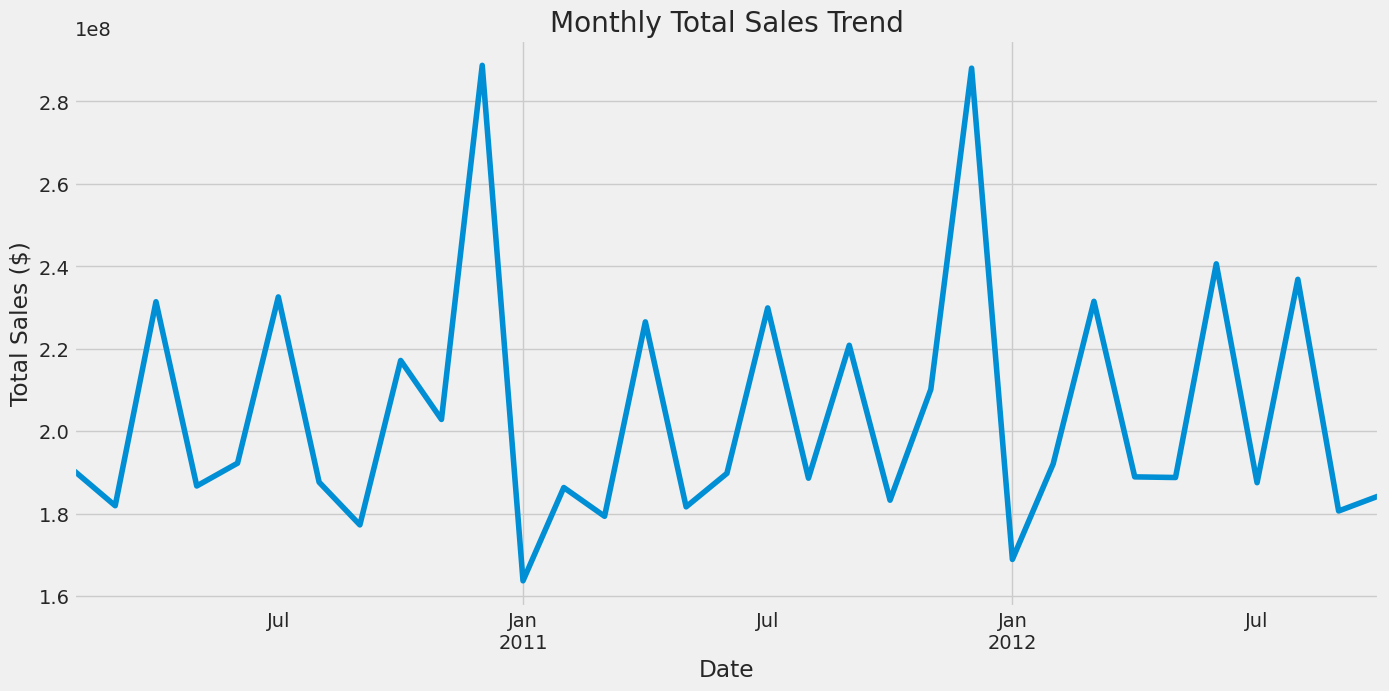

In [17]:
plt.figure(figsize=(15, 7))

# Plotting the overall trend
monthly_sales.plot(ax=plt.gca(), title='Monthly Total Sales Trend', legend=False)
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show

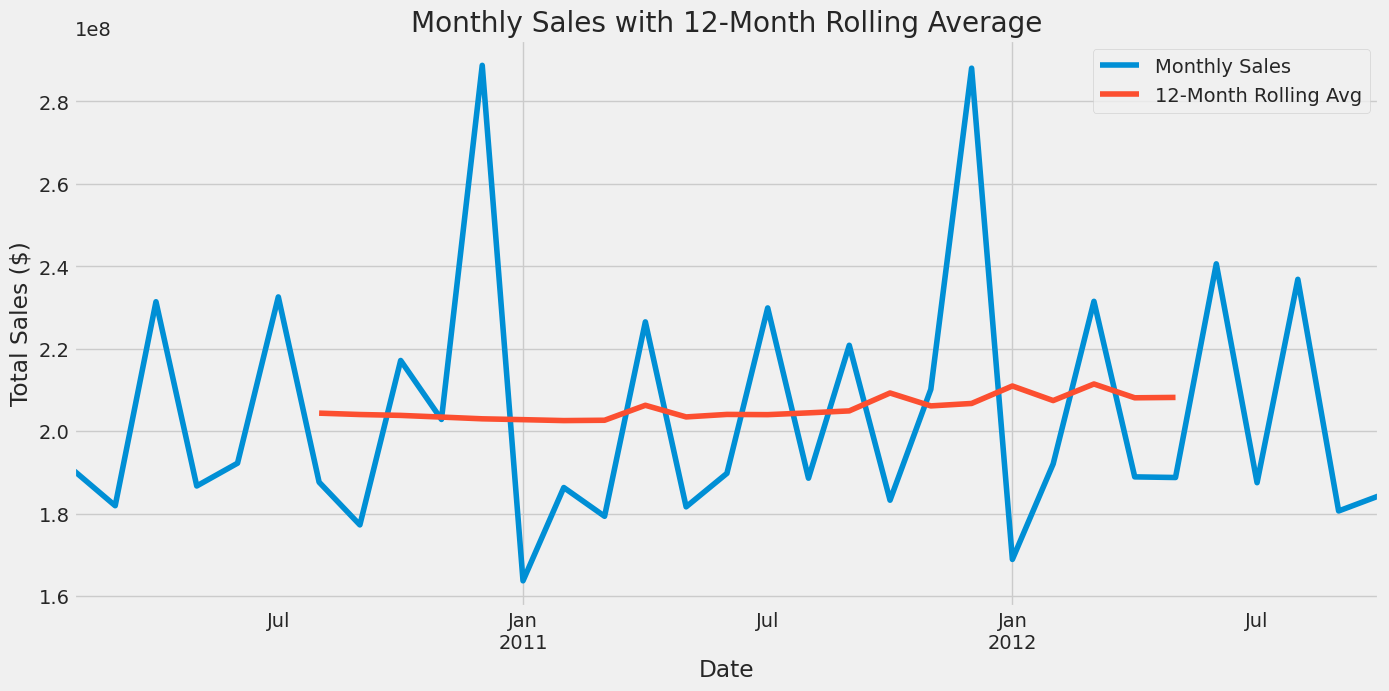

In [19]:
# Plotting with a 12-month rolling average to show the underlying trend
plt.figure(figsize=(15, 7))
monthly_sales['12_month_rolling_avg'] = monthly_sales['Weekly_Sales_y'].rolling(window=12, center=True).mean()
monthly_sales.plot(y=['Weekly_Sales_y', '12_month_rolling_avg'], ax=plt.gca(), title='Monthly Sales with 12-Month Rolling Average', legend=True)
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend(['Monthly Sales', '12-Month Rolling Avg'])
plt.grid(True)
plt.show()

In [21]:
# Seasonal decomposition of the time series
# The model assumes additive seasonality (Actual = Trend + Seasonal + Residual)
decomposition = seasonal_decompose(monthly_sales['Weekly_Sales_y'], model='additive', period=12) # Use period=12 for yearly seasonality

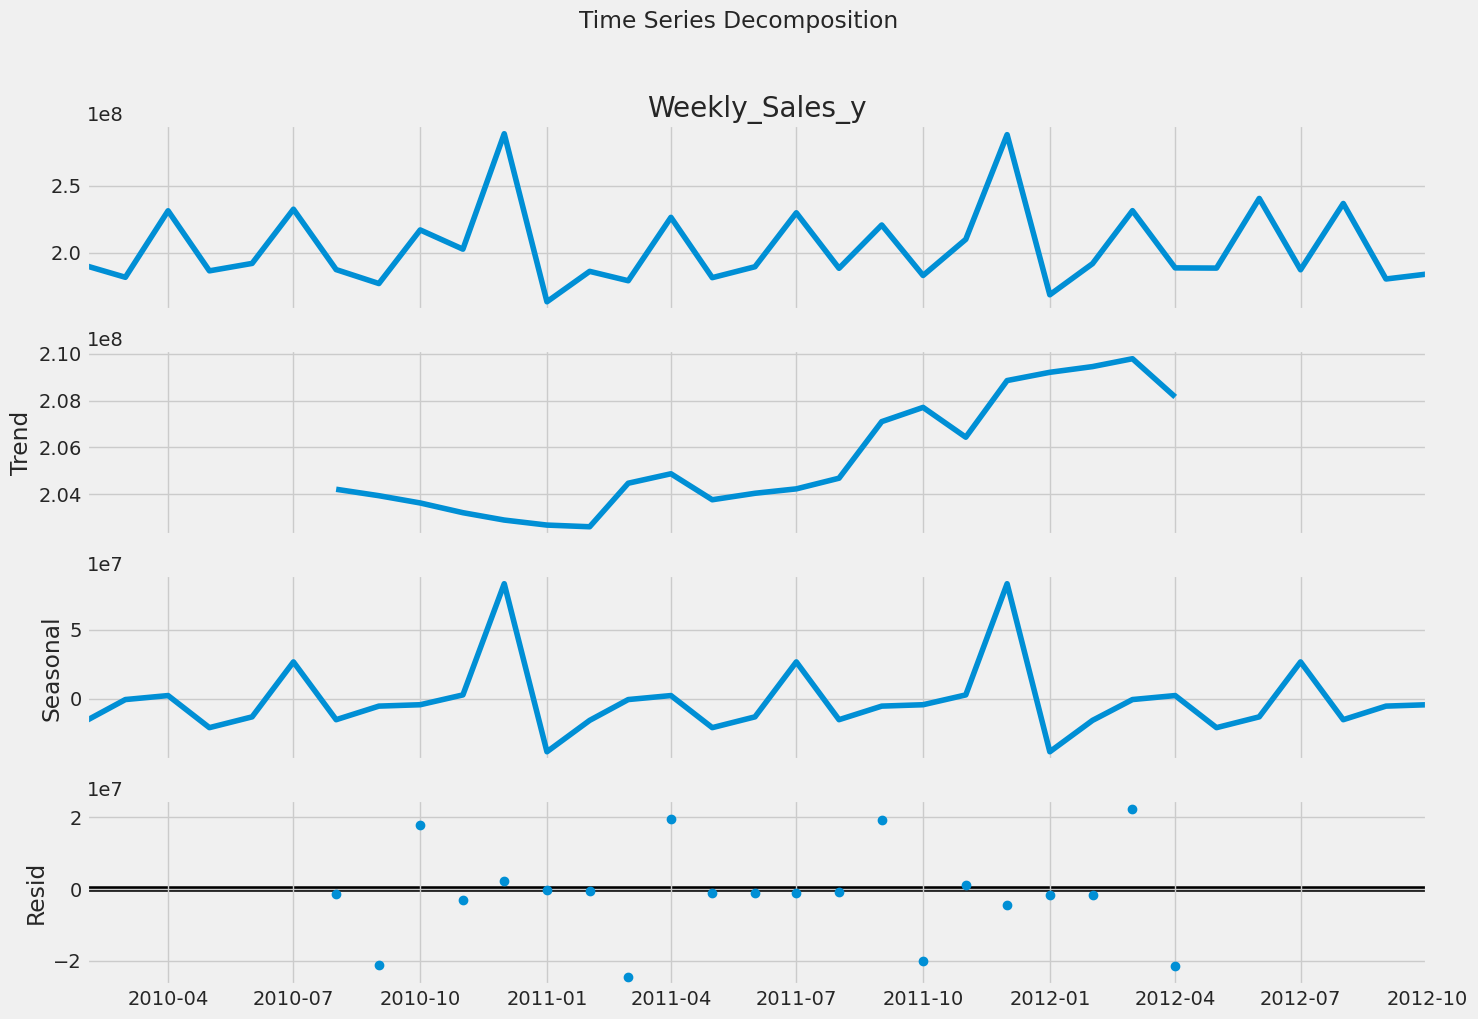

In [22]:
fig = decomposition.plot()
fig.set_size_inches(15, 10)
fig.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout()
plt.show()

In [23]:
# Break down revenue by 'product' (Department)
# Find the top 5 departments by total sales
top_5_depts = df.groupby('Dept')['Weekly_Sales_y'].sum().nlargest(5).index

<ipython-input-24-9cb37db8e84b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = df[df['Dept'] == dept].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-24-9cb37db8e84b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = df[df['Dept'] == dept].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-24-9cb37db8e84b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = df[df['Dept'] == dept].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-24-9cb37db8e84b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = df[df['Dept'] == dept].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-24-9cb37db8e84b>:3: FutureWarning: 'M' is deprecated and will be removed 

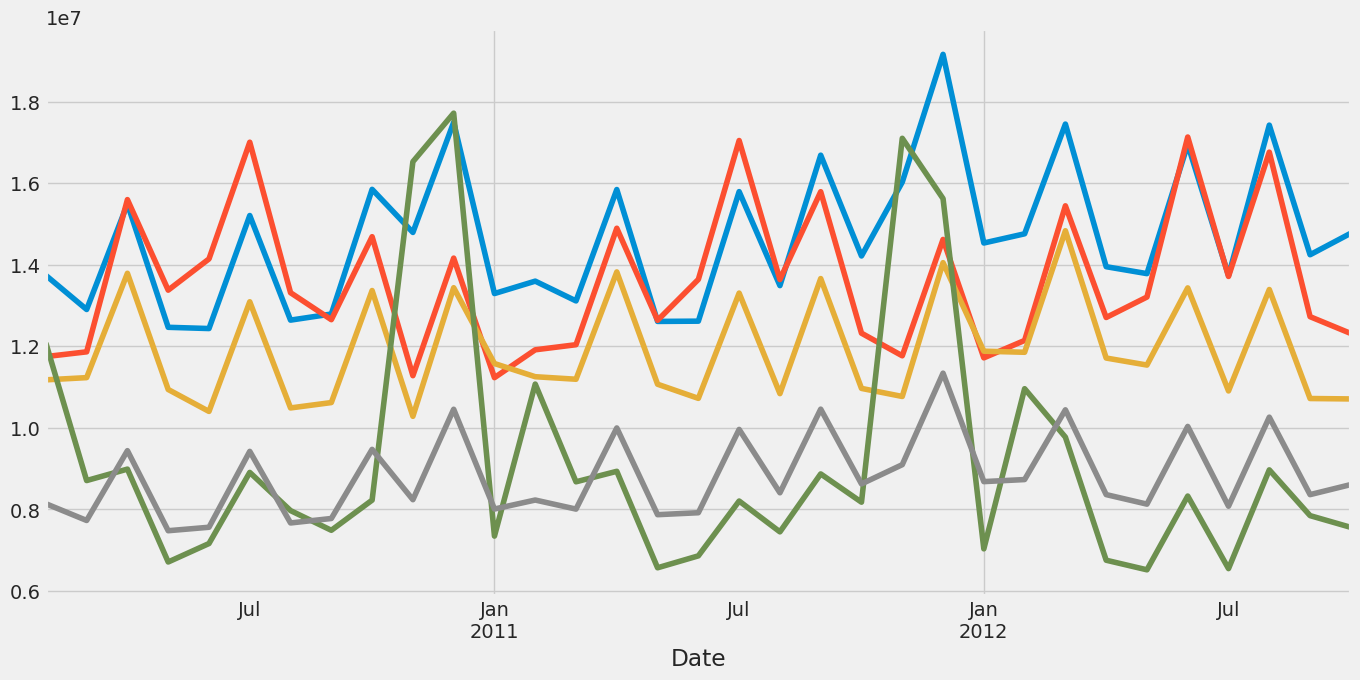

In [24]:
plt.figure(figsize=(15, 7))
for dept in top_5_depts:
    dept_sales = df[df['Dept'] == dept].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
    dept_sales.plot(label=f'Dept {dept}')

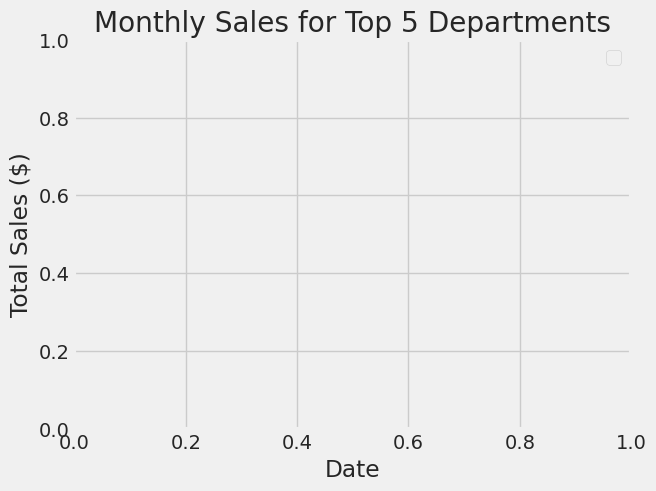

In [33]:
plt.title('Monthly Sales for Top 5 Departments')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend('Dept')
plt.grid(True)
plt.show()

<ipython-input-27-e759ea110f2f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df[df['Store'] == store].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-27-e759ea110f2f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df[df['Store'] == store].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-27-e759ea110f2f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df[df['Store'] == store].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
<ipython-input-27-e759ea110f2f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df[df['Store'] == store].set_index('Date').resample('M')['Weekly_Sales_y'].sum()


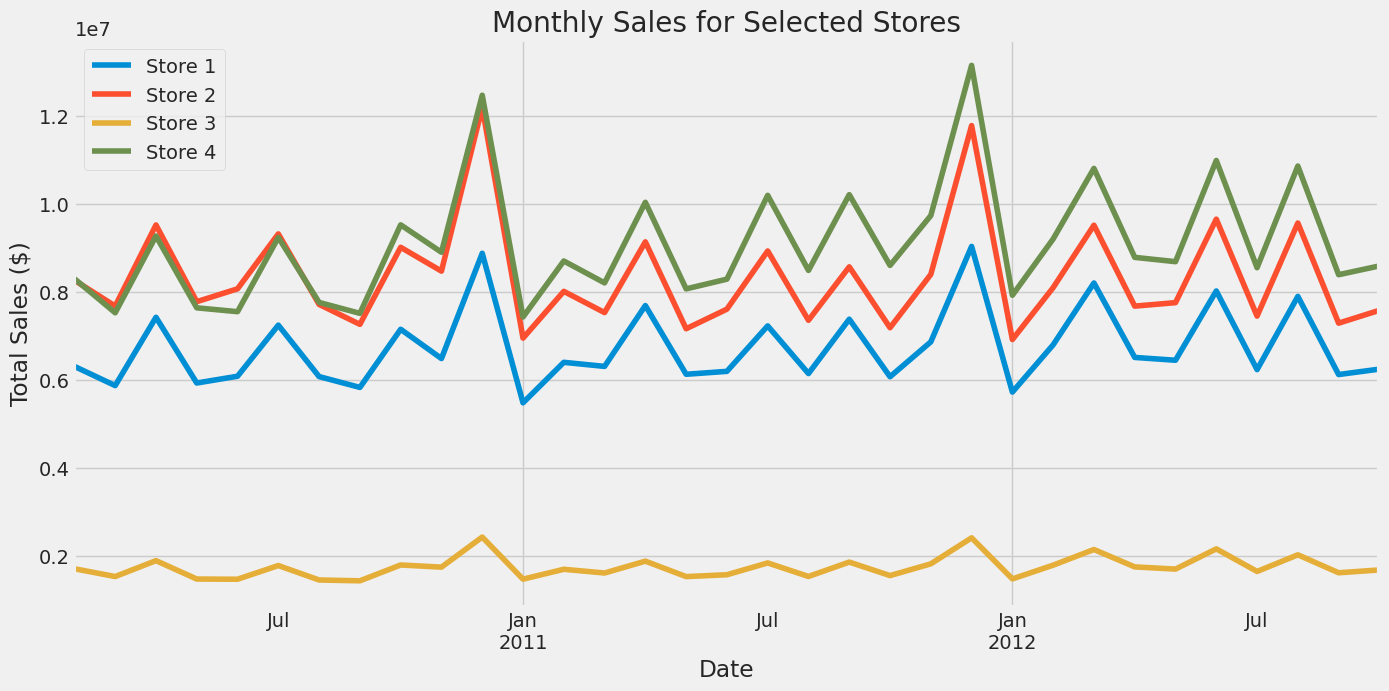

In [27]:
# Break down revenue by 'region' (Store)
# Select a few stores to compare
stores_to_plot = [1, 2, 3, 4]

plt.figure(figsize=(15, 7))
for store in stores_to_plot:
    store_sales = df[df['Store'] == store].set_index('Date').resample('M')['Weekly_Sales_y'].sum()
    store_sales.plot(label=f'Store {store}')

plt.title('Monthly Sales for Selected Stores')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Simple forecasting using a rolling mean
# Let's forecast for the next 3 months based on the last 12 months' rolling average

# Get the last valid rolling average value
last_rolling_avg = monthly_sales['12_month_rolling_avg'].dropna().iloc[-1]

In [29]:
# Create a future date index for forecasting
last_date = monthly_sales.index[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='M')[1:] # Next 3 months

<ipython-input-29-d3c43d671772>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=4, freq='M')[1:] # Next 3 months


In [30]:
# Create a forecast series
forecast = pd.Series([last_rolling_avg] * len(future_dates), index=future_dates)

<Axes: xlabel='Date'>

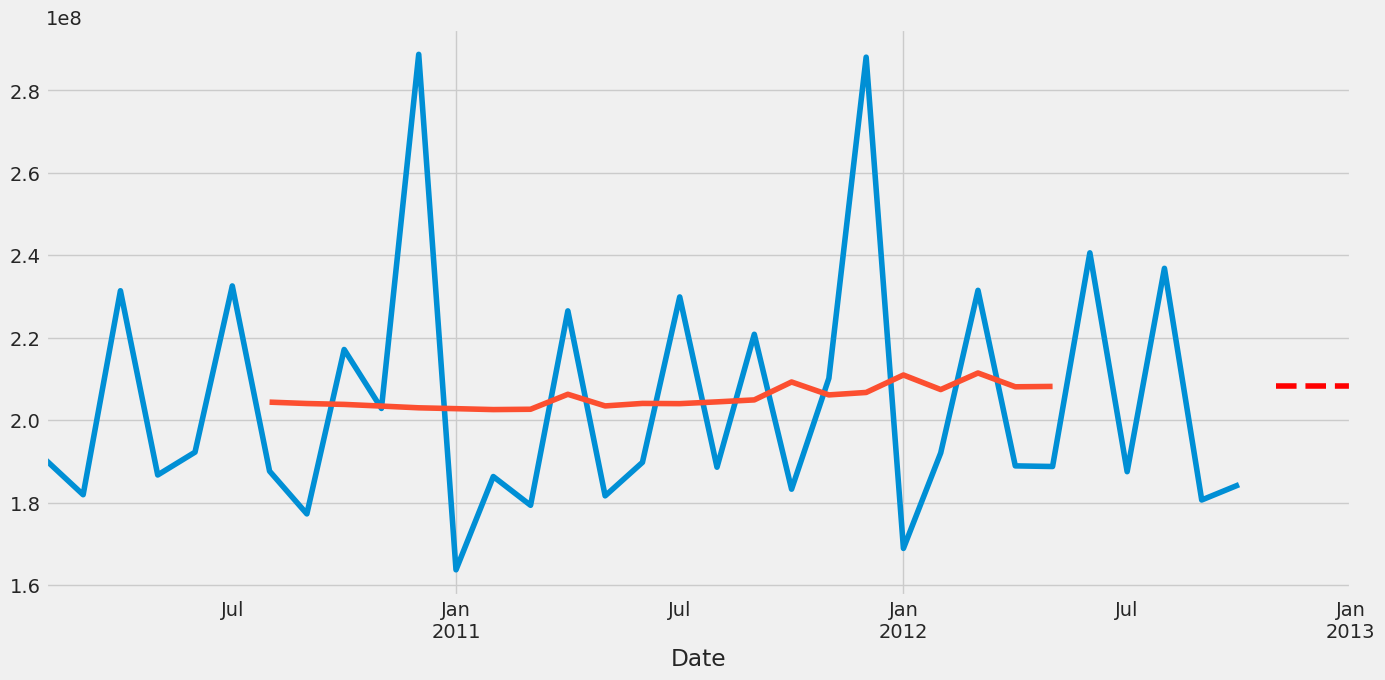

In [31]:
# Plot the original sales, the rolling average, and the forecast
plt.figure(figsize=(15, 7))
monthly_sales['Weekly_Sales_y'].plot(label='Actual Monthly Sales')
monthly_sales['12_month_rolling_avg'].plot(label='12-Month Rolling Average')
forecast.plot(linestyle='--', color='red', label='Forecasted Sales (Rolling Mean)')

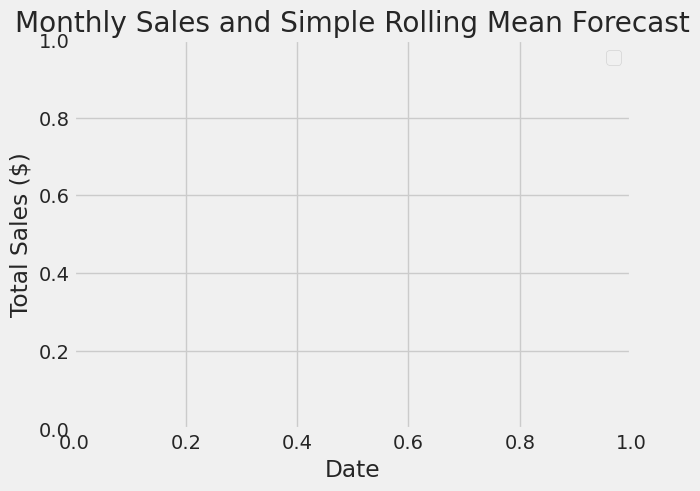

In [34]:
plt.title('Monthly Sales and Simple Rolling Mean Forecast')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend('Weekly_Sales_y')
plt.grid(True)
plt.show()